# Problem Definition

Prediction of annomilies in Hotel Room Prices

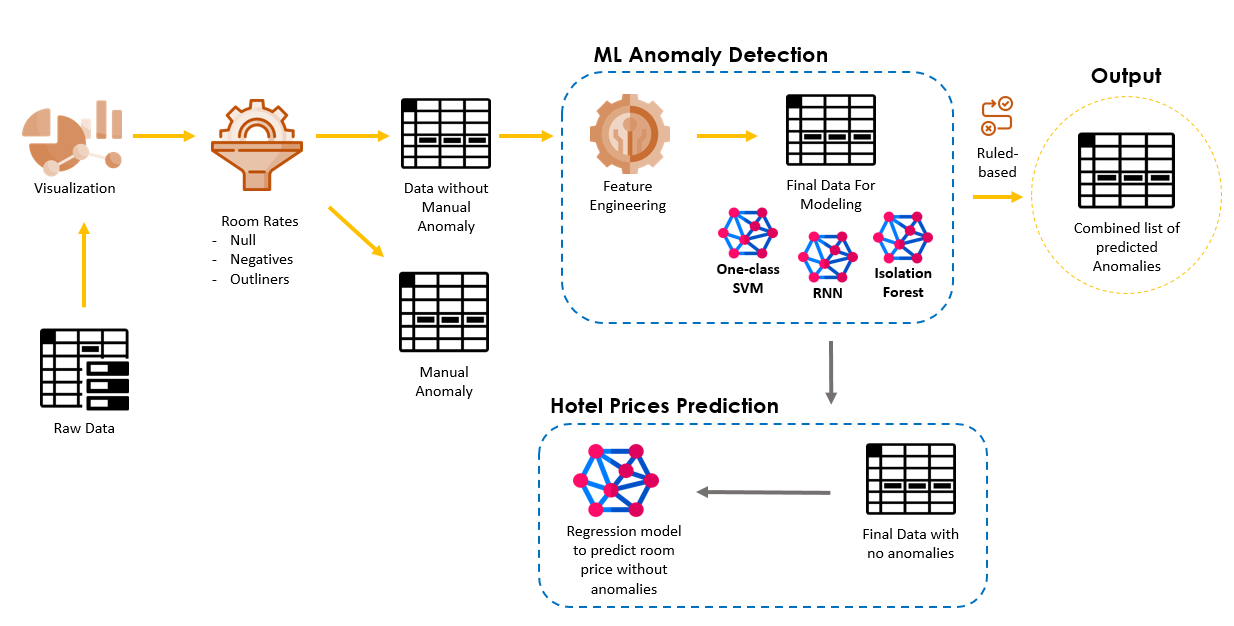

In [78]:
from IPython.display import Image
Image("workflow-2.png")

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline 

C:\Users\ysami\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Importing Datasets

Reading the dataset 

In [2]:
hotels = pd.read_csv("DATATHON_STU.csv")

## Data Inspection

In [3]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904779 entries, 0 to 904778
Data columns (total 15 columns):
Unnamed: 0          904779 non-null int64
hotel_hkey          904779 non-null int64
contract_id_hkey    904779 non-null int64
id_hkey             904779 non-null int64
city_code           904779 non-null int64
category_room       904779 non-null object
contract_type       904779 non-null object
room_type           904779 non-null object
meal_basis          904779 non-null object
creation_date       904779 non-null object
arrival_date        904779 non-null object
departure_date      904779 non-null object
total_cost          895965 non-null float64
star_rating         904779 non-null object
row_id              904779 non-null int64
dtypes: float64(1), int64(6), object(8)
memory usage: 103.5+ MB


In [5]:
hotels.head()

,Unnamed: 0,hotel_hkey,contract_id_hkey,id_hkey,city_code,category_room,contract_type,room_type,meal_basis,creation_date,arrival_date,departure_date,total_cost,star_rating,row_id
0,0,-8267178856752109189,-2268968424949879745,-7057068746275558393,1,ST-1,NOR,DBL,BB,2018-05-15,2018-12-27,2019-01-02,10547.630400,4,0
1,1,-1685290188623826844,-6660022717883519295,-2196849751944447984,0,ST,NRF,DBT,RO,2018-05-15,2018-07-21,2018-07-24,488.373126,3,1
2,2,-7840397635682426109,-5150800997425879880,-8665482707194037246,0,PP,NONE,DBL,BB,2018-05-15,2018-08-29,2018-09-02,13510.070688,5,2
3,3,-6857665811800939251,-7369482760620721804,8416789533981337661,1,ST,NOR,TWN,BB,2018-05-15,2018-05-24,2018-05-27,5103.259200,3,3
4,4,-7182313616126400607,-8424448225994711484,-886133892282086847,6,ST,OPQ,CAB,RO,2018-05-15,2018-11-24,2018-11-29,12820.430298,4,4


In [5]:
hotels.describe()

,Unnamed: 0,hotel_hkey,contract_id_hkey,id_hkey,city_code,total_cost,row_id
count,904779.00000,9.047790e+05,9.047790e+05,9.047790e+05,904779.000000,8.959650e+05,904779.00000
mean,452389.00000,-7.003372e+15,5.823435e+15,-2.532165e+15,4.121876,5.946873e+03,452389.00000
std,261187.34394,5.319249e+18,5.324853e+18,5.320072e+18,2.663020,4.338763e+04,261187.34394
min,0.00000,-9.223350e+18,-9.223363e+18,-9.223354e+18,0.000000,-8.388000e+03,0.00000
25%,226194.50000,-4.613423e+18,-4.599186e+18,-4.603733e+18,2.000000,1.486913e+03,226194.50000
50%,452389.00000,-4.613786e+15,8.571295e+15,-5.684415e+15,4.000000,3.464244e+03,452389.00000
75%,678583.50000,4.591922e+18,4.621208e+18,4.604243e+18,7.000000,7.341916e+03,678583.50000
max,904778.00000,9.223359e+18,9.223357e+18,9.223368e+18,8.000000,3.553954e+07,904778.00000


In [5]:
hotels.isnull().sum()

Unnamed: 0             0
hotel_hkey             0
contract_id_hkey       0
id_hkey                0
city_code              0
category_room          0
contract_type          0
room_type              0
meal_basis             0
creation_date          0
arrival_date           0
departure_date         0
total_cost          8814
star_rating            0
row_id                 0
dtype: int64

### Category Room Levels

In [6]:
hotels.category_room.value_counts()

ST          413350
DX           71600
SU           31869
SU-1         30277
AS           23155
XX-SU        22757
SP           18222
QN           11548
ST-1          9696
KG            8608
C2            7616
OM            7507
VM            7253
EJ            6864
GD            6620
PE            5715
EY            5113
XX-2B         4854
PI            4822
OV            4552
DX-1          4467
DX-KG         4155
XX-1B         4131
B1            4113
LX            3745
NM            3700
B2            3581
1B-1          3433
DB            3136
C3            3024
             ...  
B-SP             1
1B-PE-TW         1
XX-B1-SU         1
AW-SU            1
AX-1             1
3B-EX            1
3D-DO            1
7T-IX-SU         1
1B-BE-SU         1
AQ-CU-OF         1
CL-SU            1
4R-C9            1
AJ               1
AC-ST            1
2Q-NM-SK         1
GD-3             1
1H-VJ            1
1M               1
C2-FM            1
DX-TW            1
DB-TD            1
FA-1        

### Contract Type Levels

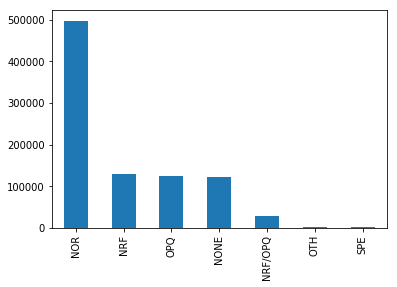

In [7]:
hotels.contract_type.value_counts().plot(kind='bar');

### Room Type Levels

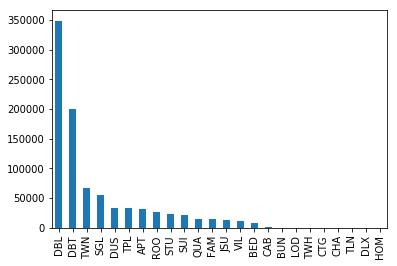

In [8]:
hotels.room_type.value_counts().plot(kind='bar');

### Meal Basis Levels

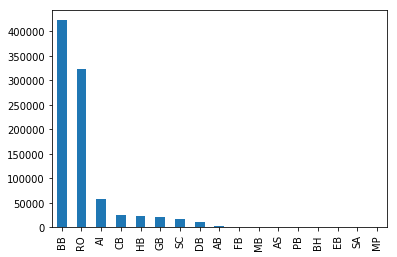

In [9]:
hotels.meal_basis.value_counts().plot(kind='bar');

### Start Rating Levels

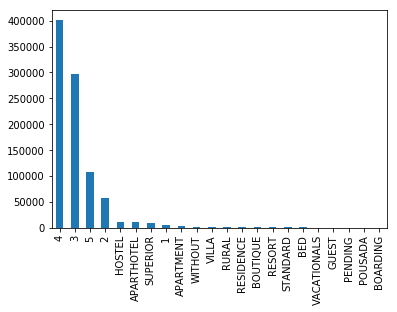

In [10]:
hotels.star_rating.value_counts().plot(kind='bar');

### City Codes

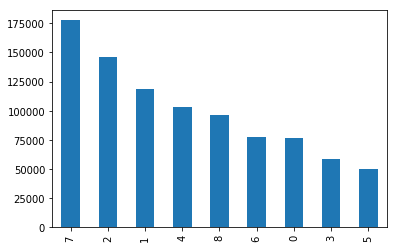

In [11]:
hotels.city_code.value_counts().plot(kind='bar');

### Total Cost

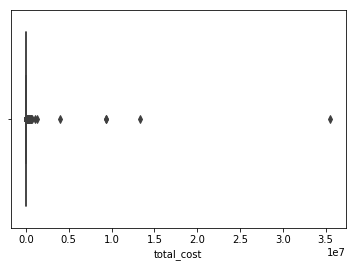

In [12]:
sns.boxplot(hotels['total_cost'].dropna());

# Feature Engineering

## Data Preperation

Update date columns

In [3]:
hotels['arrival_date'] = pd.to_datetime(hotels['arrival_date'])
hotels['creation_date'] = pd.to_datetime(hotels['creation_date'])
hotels['departure_date'] = pd.to_datetime(hotels['departure_date'])

## New Features

New variables to later encode and not loose old ones

In [4]:
hotels['new_rating'] = hotels.star_rating
hotels['new_basis'] = hotels.meal_basis
hotels['new_rtype'] = hotels.room_type
hotels['new_ctype'] = hotels.contract_type
hotels['new_catroom'] = hotels['category_room'].str.split('-').str[0]

Encoding any factor value below 100 into the "Other" category

In [5]:
levelschange = [x for x in hotels.columns if x in ['new_rating','new_basis','new_rtype','new_ctype', 'new_catroom']]

for level in levelschange:
    values_factor = hotels[level].value_counts()
    lessthan = values_factor[values_factor < 100]
    listnow = hotels[level].isin(list(lessthan.keys()))
    hotels.loc[listnow,level] = 'Others'
    #hotels[level] = preprocessing.LabelEncoder().fit_transform(hotels[level].astype(str))

Creating month of booking as 'trip_month' and day of the week as 'trip_dow' to have more time granularity

In [6]:
hotels['trip_month'] = hotels.arrival_date.dt.month
hotels['trip_dow'] = hotels.arrival_date.dt.weekday_name

# Encodign new variable trip_dow
#hotels['trip_dow'] = preprocessing.LabelEncoder().fit_transform(hotels['trip_dow'])

We created a column that measure the duration between the booking date and the arrival date. This feature is a measure of how much plannified the trip is.

In [7]:
planning_duration = hotels.arrival_date - hotels.creation_date
planning_duration = pd.DataFrame({'planning_duration':planning_duration/ np.timedelta64(1, 'D')})
hotels = pd.concat([hotels, planning_duration], axis=1)

We have created a column to measure the number of nights on the trip

In [8]:
number_nights = hotels.departure_date - hotels.arrival_date
number_nights = pd.DataFrame({'number_nights':number_nights/ np.timedelta64(1, 'D')})
hotels = pd.concat([hotels, number_nights], axis=1)

In [39]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904779 entries, 0 to 904778
Data columns (total 32 columns):
Unnamed: 0           904779 non-null int64
hotel_hkey           904779 non-null int64
contract_id_hkey     904779 non-null int64
id_hkey              904779 non-null int64
city_code            904779 non-null int64
category_room        904779 non-null object
contract_type        904779 non-null object
room_type            904779 non-null object
meal_basis           904779 non-null object
creation_date        904779 non-null datetime64[ns]
arrival_date         904779 non-null datetime64[ns]
departure_date       904779 non-null datetime64[ns]
total_cost           895965 non-null float64
star_rating          904779 non-null object
row_id               904779 non-null int64
new_rating           904779 non-null object
new_basis            904779 non-null object
new_rtype            904779 non-null object
new_ctype            904779 non-null object
new_catroom          904779 non-nu

We have created a column to measure the cost per nights to compare an normalize the cost variable

In [9]:
night_cost = pd.DataFrame({'night_cost':hotels.total_cost / hotels.number_nights})
hotels = pd.concat([hotels, night_cost], axis=1)

In [155]:
#FUTURE IMPROVEMENT > FOR LOOP
#encode_feat = ['trip_month', 'trip_dow']
#for feature in cat_feat_train:
#    X_train[feature] = preprocessing.LabelEncoder().fit_transform(X_train[feature].astype(str))

## Exploration of new time features

Viewing Number of Reservations Over time

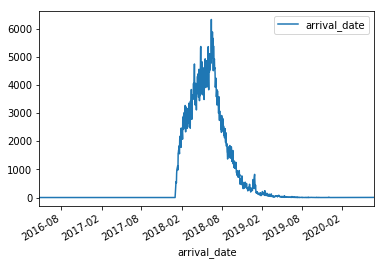

In [215]:
hotels.loc[:,["arrival_date"]].groupby(hotels["arrival_date"]).count().plot(kind="line");

Viewing cost over time

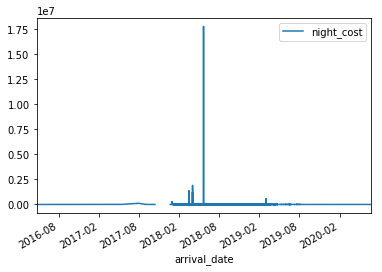

In [22]:
hotels.plot(x='arrival_date', y='night_cost');

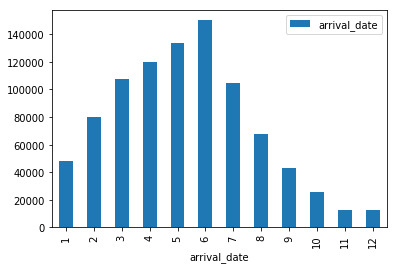

In [23]:
hotels.loc[:,["arrival_date"]].groupby(hotels["arrival_date"].dt.month).count().plot(kind="bar");

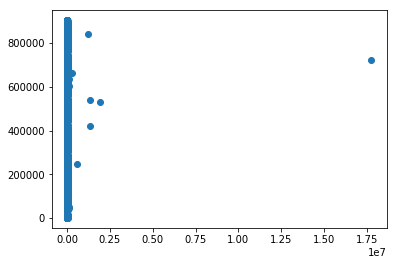

In [24]:
plt.scatter(hotels.night_cost,hotels.row_id)

In [25]:
len(hotels[hotels.night_cost>30000]['night_cost'])

81

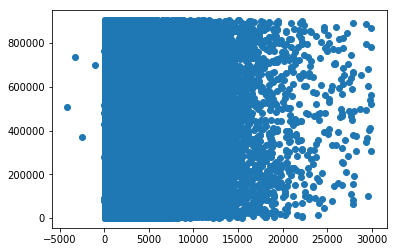

In [26]:
plt.scatter(hotels[hotels.night_cost<30000]['night_cost'] ,hotels[hotels.night_cost<30000]['row_id']);

# Anomaly Detection

## NAN Prices

In [10]:
anomaly_df=hotels[(hotels.total_cost.isnull())]
anomaly_df=anomaly_df.reset_index()
main_df=hotels[(hotels.total_cost.notnull())]

## Prices <1 or night price More than 30000

In [11]:
anomaly_df=anomaly_df.append(hotels[(hotels.total_cost<1) |(hotels.night_cost>30000) ])
anomaly_df=anomaly_df.reset_index()
main_df=hotels[(hotels.total_cost>1) & (hotels.night_cost<=30000) ]
main_df=main_df.reset_index()

## Obvious Outliers in Night_Cost 

In [121]:
main_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895876 entries, 0 to 895875
Data columns (total 26 columns):
index                895876 non-null int64
Unnamed: 0           895876 non-null int64
hotel_hkey           895876 non-null int64
contract_id_hkey     895876 non-null int64
id_hkey              895876 non-null int64
city_code            895876 non-null int64
category_room        895876 non-null object
contract_type        895876 non-null object
room_type            895876 non-null object
meal_basis           895876 non-null object
creation_date        895876 non-null datetime64[ns]
arrival_date         895876 non-null datetime64[ns]
departure_date       895876 non-null datetime64[ns]
total_cost           895876 non-null float64
star_rating          895876 non-null object
row_id               895876 non-null int64
new_rating           895876 non-null object
new_basis            895876 non-null object
new_rtype            895876 non-null object
new_ctype            895876 non-nul

In [30]:
anomaly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8903 entries, 0 to 8902
Data columns (total 27 columns):
level_0              8903 non-null int64
Unnamed: 0           8903 non-null int64
arrival_date         8903 non-null datetime64[ns]
category_room        8903 non-null object
city_code            8903 non-null int64
contract_id_hkey     8903 non-null int64
contract_type        8903 non-null object
creation_date        8903 non-null datetime64[ns]
departure_date       8903 non-null datetime64[ns]
hotel_hkey           8903 non-null int64
id_hkey              8903 non-null int64
index                8814 non-null float64
meal_basis           8903 non-null object
new_basis            8903 non-null object
new_catroom          8903 non-null object
new_ctype            8903 non-null object
new_rating           8903 non-null object
new_rtype            8903 non-null object
night_cost           89 non-null float64
number_nights        8903 non-null float64
planning_duration    8903 non-null

In [12]:
not_hotel_ids=main_df[~main_df.star_rating.isin(['1','2','3','4','5'])]['row_id']

# Models

In [13]:
factorschange=[x for x in main_df.columns if x in ['category_room','contract_type','room_type','meal_basis', 'new_rating','new_basis','new_rtype','new_ctype','new_catroom','trip_dow']]
for factor in factorschange:
    # names to numbers
    main_df[factor] = preprocessing.LabelEncoder().fit_transform(main_df[factor].astype(str))

In [14]:
features = ['city_code',
    'new_rating', 
    'new_basis', 
    'new_rtype', 
    'new_ctype', 
    'new_catroom', 
    'trip_month',
    'trip_dow',
    'planning_duration',
    'number_nights',
    'night_cost']

## One class SVM

Strictly-speaking, the One-class SVM is not an outlier-detection method, but a novelty-detection method: its training set should not be contaminated by outliers as it may fit them. That said, outlier detection in high-dimension, or without any assumptions on the distribution of the inlying data is very challenging, and a One-class SVM gives useful results in these situations

In [15]:
# new dataframe for OneClassSVM
df_svm = main_df.loc[:,features]

# Droping NAs. Not including the NULLS in total_cost variable
#df_svm = df_svm.dropna(how='any')

# An estimation of anomly population of the dataset (necessary for the algorithm)
outliers_fraction = 0.005

In [16]:
df_svm.head()

,city_code,new_rating,new_basis,new_rtype,new_ctype,new_catroom,trip_month,trip_dow,planning_duration,number_nights,night_cost
0,1,3,3,4,1,102,12,4,226.0,6.0,1757.938400
1,0,2,11,5,2,102,7,2,67.0,3.0,162.791042
2,0,4,3,4,0,86,8,6,106.0,4.0,3377.517672
3,1,2,3,16,1,102,5,4,9.0,3.0,1701.086400
4,6,3,11,3,4,102,11,2,193.0,5.0,2564.086060


In [17]:
from sklearn.svm import OneClassSVM
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(df_svm)
# train one class SVM 
model =  OneClassSVM(nu=0.998 * outliers_fraction)
data_svm = pd.DataFrame(np_scaled)
model.fit(data_svm)
# add the data to the main  
df_svm['anomaly_svm'] = pd.Series(model.predict(data_svm))
df_svm['anomaly_svm'] = df_svm['anomaly_svm'].map( {1: 0, -1: 1} )
print(df_svm['anomaly_svm'].value_counts())

0    891407
1      4469
Name: anomaly_svm, dtype: int64


In [18]:
anomaly_OCSVM=pd.concat([main_df['row_id'],df_svm['anomaly_svm']], axis=1)
anomaly_OCSVM=anomaly_OCSVM.loc[anomaly_OCSVM.anomaly_svm==1]
anomaly_OCSVM=anomaly_OCSVM.reset_index()

In [38]:
anomaly_OCSVM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 3 columns):
index          4469 non-null int64
row_id         4469 non-null int64
anomaly_svm    4469 non-null int64
dtypes: int64(3)
memory usage: 104.8 KB


In [120]:
# EXPORTING RESULTS
#df.to_csv('anomaliesOneClassSVM.csv', index=True)

Vizualization of the Anomaly

C:\Users\ysami\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


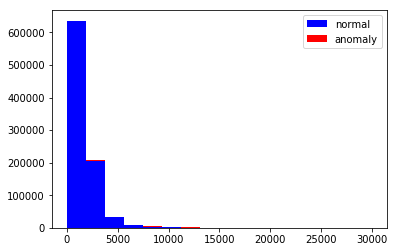

In [19]:
a = df_svm.loc[df_svm['anomaly_svm'] == 0, 'night_cost']
b = df_svm.loc[df_svm['anomaly_svm'] == 1, 'night_cost']

fig, axs = plt.subplots()
axs.hist([a,b], bins=16, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.legend()
plt.show()

# Isolation Forest

One efficient way of performing outlier detection in high-dimensional datasets is to use random forests. The ensemble.IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.


In [20]:
df_IF=main_df[features]

In [21]:
min_max_scaler = preprocessing.StandardScaler()
df_scaled = min_max_scaler.fit_transform(df_IF)
df_IF = pd.DataFrame(df_scaled)

In [22]:
outliers = 0.005
model_IF =  IsolationForest(contamination=outliers, n_estimators=150, random_state=10)
model_IF.fit(df_IF)

IsolationForest(bootstrap=False, contamination=0.005, max_features=1.0,
        max_samples='auto', n_estimators=150, n_jobs=1, random_state=10,
        verbose=0)

In [23]:
df_IF['anomaly_IF'] = pd.Series(model_IF.predict(df_IF))
df_IF['anomaly_IF'] = df_IF['anomaly_IF'].map( {1: 0, -1: 1} )
print(df_IF['anomaly_IF'].value_counts())

0    891396
1      4480
Name: anomaly_IF, dtype: int64


In [25]:
anomaly_IF=pd.concat([main_df['row_id'],df_IF['anomaly_IF']], axis=1)
anomaly_IF=anomaly_IF.loc[anomaly_IF.anomaly_IF==1]
anomaly_IF=anomaly_IF.reset_index()

In [26]:
anomaly_IF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4480 entries, 0 to 4479
Data columns (total 3 columns):
index         4480 non-null int64
row_id        4480 non-null int64
anomaly_IF    4480 non-null int64
dtypes: int64(3)
memory usage: 105.1 KB


# Recurrent Neural Network

Creating new dataframe for RNN

In [46]:
rnn_hotels = main_df[features]

Fill NA with 0, because we couldn't use it in RNN

In [60]:
#rnn_hotels['total_cost'] = rnn_hotels.total_cost.fillna(0)

In [71]:
rnn_hotels.describe()

,city_code,new_rating,new_basis,new_rtype,new_ctype,new_catroom,trip_month,trip_dow,planning_duration,number_nights,night_cost
count,895876.000000,895876.000000,895876.000000,895876.000000,895876.000000,895876.000000,895876.000000,895876.000000,895876.000000,895876.000000,895876.000000
mean,4.115747,2.940257,6.184105,6.948625,1.511761,82.957172,5.278758,2.932584,60.972968,3.425191,1635.461694
std,2.665905,1.878235,3.968734,4.505443,1.206020,30.509747,2.474446,2.027073,69.346826,2.714376,1455.547530
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-727.000000,1.000000,4.928486
25%,2.000000,2.000000,3.000000,4.000000,1.000000,54.000000,3.000000,1.000000,10.000000,1.000000,770.577600
50%,4.000000,3.000000,3.000000,5.000000,1.000000,102.000000,5.000000,3.000000,35.000000,3.000000,1278.737319
75%,7.000000,3.000000,11.000000,11.000000,2.000000,102.000000,7.000000,5.000000,89.000000,4.000000,2040.581263
max,8.000000,17.000000,12.000000,17.000000,6.000000,115.000000,12.000000,6.000000,756.000000,152.000000,29973.120000


Because we had negative and very big data in total_cost, we change all negatives to 0, and which more than 20000 to 20000.

For RNN, all variables must be float, so we check which one we need to change.

In [61]:
rnn_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895957 entries, 0 to 895956
Data columns (total 11 columns):
city_code            895957 non-null int64
new_rating           895957 non-null int64
new_basis            895957 non-null int64
new_rtype            895957 non-null int64
new_ctype            895957 non-null int64
new_catroom          895957 non-null int64
trip_month           895957 non-null int64
trip_dow             895957 non-null int64
planning_duration    895957 non-null float64
number_nights        895957 non-null float64
night_cost           895957 non-null float64
dtypes: float64(3), int64(8)
memory usage: 75.2 MB


Select and standardizt data, add some important parameters and train/size and creating traing and test data.

In [58]:
#df = rnn_hotels[['total_cost', 'city_code', 'new_rating', 'new_basis', 'new_rtype', 'new_ctype', 'new_catroom', 'trip_month', 'trip_dow', 'planning_duration', 'number_nights']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(rnn_hotels)
df_rnn = pd.DataFrame(np_scaled)

prediction_time = 1 
testdatasize = 200000
unroll_length = 50
testdatacut = testdatasize + unroll_length  + 1

x_train = df_rnn[0:-prediction_time-testdatacut].as_matrix()
y_train = df_rnn[prediction_time:-testdatacut  ][10].as_matrix()

x_test = df_rnn.as_matrix()
y_test = df_rnn[10].as_matrix()

Create unroll (create sequence of 50 previous data points for each data points) and adapt the dataset for the sequence data shape

In [59]:
def unroll(data,sequence_length=24):
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    return np.asarray(result)

x_train = unroll(x_train,unroll_length)
x_test  = unroll(x_test,unroll_length)
y_train = y_train[-x_train.shape[0]:]
y_test  = y_test[-x_test.shape[0]:]

print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (695774, 50, 11)
y_train (695774,)
x_test (895826, 50, 11)
y_test (895826,)


In [60]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time #helper libraries
from keras.models import model_from_json
import sys

Build the model

In [61]:
model = Sequential()

model.add(LSTM(
    input_shape=(None, x_train.shape[-1]),
    units = 50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    150,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    units=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : {}'.format(time.time() - start))

compilation time : 0.02792525291442871


Train the model

In [95]:
model.fit(
    x_train,
    y_train,
    batch_size=3028,
    nb_epoch=35,
    validation_split=0.1)

C:\Users\ysami\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 626196 samples, validate on 69578 samples
Epoch 1/35
626196/626196 [==============================] - 544s 869us/step - loss: 0.9974 - val_loss: 0.9983
Epoch 2/35
626196/626196 [==============================] - 539s 861us/step - loss: 0.9969 - val_loss: 0.9980
Epoch 3/35
626196/626196 [==============================] - 551s 880us/step - loss: 0.9967 - val_loss: 0.9979
Epoch 4/35
626196/626196 [==============================] - 548s 874us/step - loss: 0.9966 - val_loss: 0.9976
Epoch 5/35
626196/626196 [==============================] - 560s 894us/step - loss: 0.9964 - val_loss: 0.9981
Epoch 6/35
626196/626196 [==============================] - 556s 888us/step - loss: 0.9963 - val_loss: 0.9979
Epoch 7/35
626196/626196 [==============================] - 544s 869us/step - loss: 0.9963 - val_loss: 0.9979
Epoch 8/35
626196/626196 [==============================] - 543s 866us/step - loss: 0.9962 - val_loss: 0.9978
Epoch 9/35
626196/626196 [==============================] - 540s 862u

Save model to JSON and load it

In [52]:
# serialize model to JSON
model_json = model.to_json()
with open("model3.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model3.h5")
print("Saved model to disk")


Saved model to disk


In [51]:

json_file = open('model3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model3.h5")
print("Loaded model from disk")


Loaded model from disk


Create the list of difference between prediction and test data

In [62]:
loaded_model = model
diff=[]
ratio=[]
p = loaded_model.predict(x_test)

for u in range(len(y_test)):
    pr = p[u][0]
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))

Plot the prediction and the reality

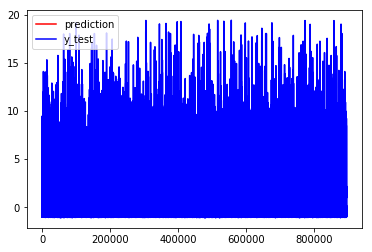

In [63]:
fig, axs = plt.subplots()
axs.plot(p,color='red', label='prediction')
axs.plot(y_test,color='blue', label='y_test')
plt.legend(loc='upper left')
plt.show()

Select the most distant prediction/reality data points as anomalies

In [64]:
outliers_fraction = 0.005

diff = pd.Series(diff)
number_of_outliers = int(outliers_fraction*len(diff))

threshold = diff.nlargest(number_of_outliers).min()

test = (diff >= threshold).astype(int)

complement = pd.Series(0, index=np.arange(len(df_rnn)-testdatasize))

df_rnn['anomaly_NN'] = complement.append(test, ignore_index='True')
print(df_rnn['anomaly_NN'].value_counts())

0    894886
1       990
Name: anomaly_NN, dtype: int64


Create submission file

submission = pd.DataFrame()
submission['anomaly'] = df.anomaly
submission['row_id'] = hotels.row_id

In [85]:
main_df

,index,Unnamed: 0,hotel_hkey,contract_id_hkey,id_hkey,city_code,category_room,contract_type,room_type,meal_basis,...,new_rating,new_basis,new_rtype,new_ctype,new_catroom,trip_month,trip_dow,planning_duration,number_nights,night_cost
0,0,0,-8267178856752109189,-2268968424949879745,-7057068746275558393,1,1176,1,6,3,...,3,3,4,1,102,12,4,226.0,6.0,1757.938400
1,1,1,-1685290188623826844,-6660022717883519295,-2196849751944447984,0,1175,2,7,14,...,2,11,5,2,102,7,2,67.0,3.0,162.791042
2,2,2,-7840397635682426109,-5150800997425879880,-8665482707194037246,0,1079,0,6,3,...,4,3,4,0,86,8,6,106.0,4.0,3377.517672
3,3,3,-6857665811800939251,-7369482760620721804,8416789533981337661,1,1175,1,22,3,...,2,3,16,1,102,5,4,9.0,3.0,1701.086400
4,4,4,-7182313616126400607,-8424448225994711484,-886133892282086847,6,1175,4,3,14,...,3,11,3,4,102,11,2,193.0,5.0,2564.086060
5,5,5,-8329594227081783343,-4368825034309681227,-7285372902651653768,5,754,1,9,3,...,3,3,6,1,54,5,6,8.0,9.0,844.625000
6,6,6,4526027891690981503,6385535533926467037,-2172786788504065449,1,1175,1,20,14,...,2,11,15,1,102,7,1,62.0,3.0,2816.550600
7,7,7,1619933340650669562,3648078336353557505,-5203291907684532426,7,1092,4,6,3,...,3,3,4,4,89,9,1,132.0,1.0,2656.200000
8,8,8,191196079505463292,2793692055751730253,-2416230042723766245,8,1180,1,0,16,...,2,12,0,1,102,4,4,338.0,4.0,527.395500
9,9,9,9095671448095038870,-5702568552120775052,4236640366982143035,2,636,1,7,3,...,3,3,5,1,49,8,2,95.0,1.0,1087.016298


# Anomalies Detection using Rule Base

In [27]:
#City 0
df_0_1 = main_df[(main_df.city_code == 0) & (main_df.star_rating == '1')]
df_0_2 = main_df[(main_df.city_code == 0) & (main_df.star_rating == '2')]
df_0_3 = main_df[(main_df.city_code == 0) & (main_df.star_rating == '3')]
df_0_4 = main_df[(main_df.city_code == 0) & (main_df.star_rating == '4')]
df_0_5 = main_df[(main_df.city_code == 0) & (main_df.star_rating == '5')]
# City 1
df_1_1 = main_df[(main_df.city_code == 1) & (main_df.star_rating == '1')]
df_1_2 = main_df[(main_df.city_code == 1) & (main_df.star_rating == '2')]
df_1_3 = main_df[(main_df.city_code == 1) & (main_df.star_rating == '3')]
df_1_4 = main_df[(main_df.city_code == 1) & (main_df.star_rating == '4')]
df_1_5 = main_df[(main_df.city_code == 1) & (main_df.star_rating == '5')]
# City 2
df_2_1 = main_df[(main_df.city_code == 2) & (main_df.star_rating == '1')]
df_2_2 = main_df[(main_df.city_code == 2) & (main_df.star_rating == '2')]
df_2_3 = main_df[(main_df.city_code == 2) & (main_df.star_rating == '3')]
df_2_4 = main_df[(main_df.city_code == 2) & (main_df.star_rating == '4')]
df_2_5 = main_df[(main_df.city_code == 2) & (main_df.star_rating == '5')]
# City 3
df_3_1 = main_df[(main_df.city_code == 3) & (main_df.star_rating == '1')]
df_3_2 = main_df[(main_df.city_code == 3) & (main_df.star_rating == '2')]
df_3_3 = main_df[(main_df.city_code == 3) & (main_df.star_rating == '3')]
df_3_4 = main_df[(main_df.city_code == 3) & (main_df.star_rating == '4')]
df_3_5 = main_df[(main_df.city_code == 3) & (main_df.star_rating == '5')]
#City 4
df_4_1 = main_df[(main_df.city_code == 4) & (main_df.star_rating == '1')]
df_4_2 = main_df[(main_df.city_code == 4) & (main_df.star_rating == '2')]
df_4_3 = main_df[(main_df.city_code == 4) & (main_df.star_rating == '3')]
df_4_4 = main_df[(main_df.city_code == 4) & (main_df.star_rating == '4')]
df_4_5 = main_df[(main_df.city_code == 4) & (main_df.star_rating == '5')]
#City 5
df_5_1 = main_df[(main_df.city_code == 5) & (main_df.star_rating == '1')]
df_5_2 = main_df[(main_df.city_code == 5) & (main_df.star_rating == '2')]
df_5_3 = main_df[(main_df.city_code == 5) & (main_df.star_rating == '3')]
df_5_4 = main_df[(main_df.city_code == 5) & (main_df.star_rating == '4')]
df_5_5 = main_df[(main_df.city_code == 5) & (main_df.star_rating == '5')]
#City 6
df_6_1 = main_df[(main_df.city_code == 6) & (main_df.star_rating == '1')]
df_6_2 = main_df[(main_df.city_code == 6) & (main_df.star_rating == '2')]
df_6_3 = main_df[(main_df.city_code == 6) & (main_df.star_rating == '3')]
df_6_4 = main_df[(main_df.city_code == 6) & (main_df.star_rating == '4')]
df_6_5 = main_df[(main_df.city_code == 6) & (main_df.star_rating == '5')]
#City 7
df_7_1 = main_df[(main_df.city_code == 7) & (main_df.star_rating == '1')]
df_7_2 = main_df[(main_df.city_code == 7) & (main_df.star_rating == '2')]
df_7_3 = main_df[(main_df.city_code == 7) & (main_df.star_rating == '3')]
df_7_4 = main_df[(main_df.city_code == 7) & (main_df.star_rating == '4')]
df_7_5 = main_df[(main_df.city_code == 7) & (main_df.star_rating == '5')]
#City 8
df_8_1 = main_df[(main_df.city_code == 8) & (main_df.star_rating == '1')]
df_8_2 = main_df[(main_df.city_code == 8) & (main_df.star_rating == '2')]
df_8_3 = main_df[(main_df.city_code == 8) & (main_df.star_rating == '3')]
df_8_4 = main_df[(main_df.city_code == 8) & (main_df.star_rating == '4')]
df_8_5 = main_df[(main_df.city_code == 8) & (main_df.star_rating == '5')]

In [28]:
#City 0
anomalies_0_1 = df_0_1[(np.abs(df_0_1.night_cost-df_0_1.night_cost.mean())>(7*df_0_1.night_cost.std()))]
anomalies_0_2 = df_0_2[(np.abs(df_0_2.night_cost-df_0_2.night_cost.mean())>(7*df_0_2.night_cost.std()))]
anomalies_0_3 = df_0_3[(np.abs(df_0_3.night_cost-df_0_3.night_cost.mean())>(7*df_0_3.night_cost.std()))]
anomalies_0_4 = df_0_4[(np.abs(df_0_4.night_cost-df_0_4.night_cost.mean())>(7*df_0_4.night_cost.std()))]
anomalies_0_5 = df_0_5[(np.abs(df_0_5.night_cost-df_0_5.night_cost.mean())>(7*df_0_5.night_cost.std()))]
#City 1
an1_1 = df_1_1[(np.abs(df_1_1.night_cost - df_1_1.night_cost.mean())>(7*df_1_1.night_cost.std()))]
an1_2 = df_1_2[(np.abs(df_1_2.night_cost - df_1_2.night_cost.mean())>(7*df_1_2.night_cost.std()))]
an1_3 = df_1_3[(np.abs(df_1_3.night_cost - df_1_3.night_cost.mean())>(7*df_1_3.night_cost.std()))]
an1_4 = df_1_4[(np.abs(df_1_4.night_cost - df_1_4.night_cost.mean())>(7*df_1_4.night_cost.std()))]
an1_5 = df_1_5[(np.abs(df_1_5.night_cost - df_1_5.night_cost.mean())>(7*df_1_5.night_cost.std()))]
#City 2
an2_1 = df_2_1[(np.abs(df_2_1.night_cost - df_2_1.night_cost.mean())>(7*df_1_1.night_cost.std()))]
an2_2 = df_2_2[(np.abs(df_2_2.night_cost - df_2_2.night_cost.mean())>(7*df_2_2.night_cost.std()))]
an2_3 = df_2_3[(np.abs(df_2_3.night_cost - df_2_3.night_cost.mean())>(7*df_2_3.night_cost.std()))]
an2_4 = df_2_4[(np.abs(df_2_4.night_cost - df_2_4.night_cost.mean())>(7*df_2_4.night_cost.std()))]
an2_5 = df_2_5[(np.abs(df_2_5.night_cost - df_2_5.night_cost.mean())>(7*df_2_5.night_cost.std()))]
#City 3
an3_1 = df_3_1[(np.abs(df_3_1.night_cost - df_3_1.night_cost.mean())>(7*df_3_1.night_cost.std()))]
an3_2 = df_3_2[(np.abs(df_3_2.night_cost - df_3_2.night_cost.mean())>(7*df_3_2.night_cost.std()))]
an3_3 = df_3_3[(np.abs(df_3_3.night_cost - df_3_3.night_cost.mean())>(7*df_3_3.night_cost.std()))]
an3_4 = df_3_4[(np.abs(df_3_4.night_cost - df_3_4.night_cost.mean())>(7*df_3_4.night_cost.std()))]
an3_5 = df_3_5[(np.abs(df_3_5.night_cost - df_3_5.night_cost.mean())>(7*df_3_5.night_cost.std()))]
#City 4
anomalies_Jorge_4_1 = df_4_1[(np.abs(df_4_1.night_cost-df_4_1.night_cost.mean())>(7*df_4_1.night_cost.std()))]
anomalies_Jorge_4_2 = df_4_2[(np.abs(df_4_2.night_cost-df_4_2.night_cost.mean())>(7*df_4_2.night_cost.std()))]
anomalies_Jorge_4_3 = df_4_3[(np.abs(df_4_3.night_cost-df_4_3.night_cost.mean())>(7*df_4_3.night_cost.std()))]
anomalies_Jorge_4_4 = df_4_4[(np.abs(df_4_4.night_cost-df_4_4.night_cost.mean())>(7*df_4_4.night_cost.std()))]
anomalies_Jorge_4_5 = df_4_5[(np.abs(df_4_5.night_cost-df_4_5.night_cost.mean())>(7*df_4_5.night_cost.std()))]
#City 5
anomalies_Jorge_5_1 = df_5_1[(np.abs(df_5_1.night_cost-df_5_1.night_cost.mean())>(7*df_5_1.night_cost.std()))]
anomalies_Jorge_5_2 = df_5_2[(np.abs(df_5_2.night_cost-df_5_2.night_cost.mean())>(7*df_5_2.night_cost.std()))]
anomalies_Jorge_5_3 = df_5_3[(np.abs(df_5_3.night_cost-df_5_3.night_cost.mean())>(7*df_5_3.night_cost.std()))]
anomalies_Jorge_5_4 = df_5_4[(np.abs(df_5_4.night_cost-df_5_4.night_cost.mean())>(7*df_5_4.night_cost.std()))]
anomalies_Jorge_5_5 = df_5_5[(np.abs(df_5_5.night_cost-df_5_5.night_cost.mean())>(7*df_5_5.night_cost.std()))]
#City 6
anomalies_Jorge_6_1 = df_6_1[(np.abs(df_6_1.night_cost-df_6_1.night_cost.mean())>(7*df_6_1.night_cost.std()))]
anomalies_Jorge_6_2 = df_6_2[(np.abs(df_6_2.night_cost-df_6_2.night_cost.mean())>(7*df_6_2.night_cost.std()))]
anomalies_Jorge_6_3 = df_6_3[(np.abs(df_6_3.night_cost-df_6_3.night_cost.mean())>(7*df_6_3.night_cost.std()))]
anomalies_Jorge_6_4 = df_6_4[(np.abs(df_6_4.night_cost-df_6_4.night_cost.mean())>(7*df_6_4.night_cost.std()))]
anomalies_Jorge_6_5 = df_6_5[(np.abs(df_6_5.night_cost-df_6_5.night_cost.mean())>(7*df_6_5.night_cost.std()))]
#City 7
anomalies_7_1 = df_7_1[(np.abs(df_7_1.night_cost-df_7_1.night_cost.mean())>(7*df_7_1.night_cost.std()))]
anomalies_7_2 = df_7_2[(np.abs(df_7_2.night_cost-df_7_2.night_cost.mean())>(7*df_7_2.night_cost.std()))]
anomalies_7_3 = df_7_3[(np.abs(df_7_3.night_cost-df_7_3.night_cost.mean())>(7*df_7_3.night_cost.std()))]
anomalies_7_4 = df_7_4[(np.abs(df_7_4.night_cost-df_7_4.night_cost.mean())>(7*df_7_4.night_cost.std()))]
anomalies_7_5 = df_7_5[(np.abs(df_7_5.night_cost-df_7_5.night_cost.mean())>(7*df_7_5.night_cost.std()))]
#City 8
anomalies_8_1 = df_8_1[(np.abs(df_8_1.night_cost-df_8_1.night_cost.mean())>(7*df_8_1.night_cost.std()))]
anomalies_8_2 = df_8_2[(np.abs(df_8_2.night_cost-df_8_2.night_cost.mean())>(7*df_8_2.night_cost.std()))]
anomalies_8_3 = df_8_3[(np.abs(df_8_3.night_cost-df_8_3.night_cost.mean())>(7*df_8_3.night_cost.std()))]
anomalies_8_4 = df_8_4[(np.abs(df_8_4.night_cost-df_8_4.night_cost.mean())>(7*df_8_4.night_cost.std()))]
anomalies_8_5 = df_8_5[(np.abs(df_8_5.night_cost-df_8_5.night_cost.mean())>(7*df_8_5.night_cost.std()))]

In [29]:
anomaly_jorge = pd.concat([anomalies_Jorge_4_1, anomalies_Jorge_4_2, anomalies_Jorge_4_3, 
                           anomalies_Jorge_4_4, anomalies_Jorge_4_5, anomalies_Jorge_5_1, anomalies_Jorge_5_2,
                          anomalies_Jorge_5_3, anomalies_Jorge_5_4, anomalies_Jorge_5_5, anomalies_Jorge_6_1,
                          anomalies_Jorge_6_2, anomalies_Jorge_6_3, anomalies_Jorge_6_4, anomalies_Jorge_6_5], axis=0)
anomaly_oscar = pd.concat([anomalies_7_1, anomalies_7_2, anomalies_7_3, anomalies_7_4, anomalies_7_5, 
                           anomalies_8_1, anomalies_8_2, anomalies_8_3, anomalies_8_4, anomalies_8_5,
                           anomalies_0_1, anomalies_0_2, anomalies_0_3, anomalies_0_4, anomalies_0_5], axis=0)

anomaly_rui = pd.concat([an1_1, an1_2,an1_3,an1_4,an1_5,an2_1,an2_2,an2_3,an2_4,an2_5, an3_1, an3_2,
                        an3_3,an3_4,an3_5], axis=0)
pre_total_anomalies = pd.concat([anomaly_jorge, anomaly_oscar,anomaly_rui], axis=0)

In [30]:
len(pre_total_anomalies)

1833

In [141]:
pre_total_anomalies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4604 entries, 888761 to 867835
Data columns (total 26 columns):
index                4604 non-null int64
Unnamed: 0           4604 non-null int64
hotel_hkey           4604 non-null int64
contract_id_hkey     4604 non-null int64
id_hkey              4604 non-null int64
city_code            4604 non-null int64
category_room        4604 non-null int64
contract_type        4604 non-null int64
room_type            4604 non-null int64
meal_basis           4604 non-null int64
creation_date        4604 non-null datetime64[ns]
arrival_date         4604 non-null datetime64[ns]
departure_date       4604 non-null datetime64[ns]
total_cost           4604 non-null float64
star_rating          4604 non-null object
row_id               4604 non-null int64
new_rating           4604 non-null int64
new_basis            4604 non-null int64
new_rtype            4604 non-null int64
new_ctype            4604 non-null int64
new_catroom          4604 non-null i

In [31]:
Total_set_of_anomalies = pd.concat([pre_total_anomalies, anomaly_df], axis=0)

In [32]:
anomalies_id = Total_set_of_anomalies.row_id

In [33]:
rule_based_anomaly=pre_total_anomalies

In [34]:
rule_based_anomaly['rule_based_anomaly']=1

In [35]:
rule_based_anomaly=rule_based_anomaly.loc[:,('row_id','rule_based_anomaly')]

# Combine Anomalies

In this section we try to find similarities among all the anomalies detection methods:<br>
1-Isolation Forest algorithm<br>
2- One Class SVM<br>
3- Rule Based

create a dataframe combining the row_id and a column for each anomaly

In [38]:
df_anomaly=pd.concat([main_df['row_id'],df_svm['anomaly_svm'], df_IF['anomaly_IF'] ], axis=1)

In [39]:
df_anomaly = pd.merge(df_anomaly,
                     rule_based_anomaly,
                     on='row_id', 
                     how='left')

In [41]:
df_anomaly['rule_based_anomaly']=df_anomaly['rule_based_anomaly'].fillna(0)

In [42]:
df_anomaly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895876 entries, 0 to 895875
Data columns (total 4 columns):
row_id                895876 non-null int64
anomaly_svm           895876 non-null int64
anomaly_IF            895876 non-null int64
rule_based_anomaly    895876 non-null float64
dtypes: float64(1), int64(3)
memory usage: 34.2 MB


Check anomaly similarity between OCSVM, IF and rule based

In [43]:
len(df_anomaly[(df_anomaly.anomaly_svm==1) & (df_anomaly.anomaly_IF==1) & (df_anomaly.rule_based_anomaly==1)])

113

In [44]:
anomaly_ids=df_anomaly[(df_anomaly.anomaly_svm==1) & (df_anomaly.anomaly_IF==1) & (df_anomaly.rule_based_anomaly==1)]['row_id']

Check anomaly similarity between OCSVM and rule based

In [45]:
len(df_anomaly[(df_anomaly.anomaly_svm==1)  & (df_anomaly.rule_based_anomaly==1)])

428

In [46]:
anomaly_ids=anomaly_ids.append(df_anomaly[(df_anomaly.anomaly_svm==1)  & (df_anomaly.rule_based_anomaly==1)]['row_id'])

Check anomaly similarity between IF and rule based

In [307]:
len(df_anomaly[(df_anomaly.anomaly_IF==1) & (df_anomaly.rule_based_anomaly==1)])

124

In [47]:
anomaly_ids=anomaly_ids.append(df_anomaly[(df_anomaly.anomaly_IF==1) & (df_anomaly.rule_based_anomaly==1)]['row_id'])

Check anomaly similarity between OCSVM and IF that are not with start rating since the rule based methods just analyzed the hotels with star rating

In [48]:
len(df_anomaly[(df_anomaly.anomaly_svm==1) & (df_anomaly.anomaly_IF==1)& df_anomaly.row_id.isin(not_hotel_ids)])

737

### Combine all unique row ids from all the different methods and their intersections

In [49]:
anomaly_ids=anomaly_ids.append(df_anomaly[(df_anomaly.anomaly_svm==1) & (df_anomaly.anomaly_IF==1)& df_anomaly.row_id.isin(not_hotel_ids)]['row_id'])

In [50]:
anomaly_ids = anomaly_ids.append(anomaly_df['row_id'])

In [51]:
anomaly_ids=anomaly_ids.unique()

In [52]:
len(anomaly_ids)

10079

In [53]:
hotels['anomaly']=0

In [218]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904779 entries, 0 to 904778
Data columns (total 26 columns):
Unnamed: 0           904779 non-null int64
hotel_hkey           904779 non-null int64
contract_id_hkey     904779 non-null int64
id_hkey              904779 non-null int64
city_code            904779 non-null int64
category_room        904779 non-null object
contract_type        904779 non-null object
room_type            904779 non-null object
meal_basis           904779 non-null object
creation_date        904779 non-null datetime64[ns]
arrival_date         904779 non-null datetime64[ns]
departure_date       904779 non-null datetime64[ns]
total_cost           895965 non-null float64
star_rating          904779 non-null object
row_id               904779 non-null int64
new_rating           904779 non-null object
new_basis            904779 non-null object
new_rtype            904779 non-null object
new_ctype            904779 non-null object
new_catroom          904779 non-nu

In [54]:
hotels.loc[hotels.row_id.isin(anomaly_ids),'anomaly']=1

In [55]:
len(hotels[hotels.anomaly==1])

10079

In [56]:
hotels_no_anomalies = hotels[hotels.anomaly==0]

# Extract Anomaly Predictions to CSV

In [318]:
hotels[['row_id','anomaly']].to_csv('hotels_anomaly.csv',index=False)

## Extract Row Ids with no expected anomaly

In [57]:
trusted_df=hotels_no_anomalies

In [58]:
trusted_df=trusted_df.reset_index()

In [59]:
trusted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894700 entries, 0 to 894699
Data columns (total 27 columns):
index                894700 non-null int64
Unnamed: 0           894700 non-null int64
hotel_hkey           894700 non-null int64
contract_id_hkey     894700 non-null int64
id_hkey              894700 non-null int64
city_code            894700 non-null int64
category_room        894700 non-null object
contract_type        894700 non-null object
room_type            894700 non-null object
meal_basis           894700 non-null object
creation_date        894700 non-null datetime64[ns]
arrival_date         894700 non-null datetime64[ns]
departure_date       894700 non-null datetime64[ns]
total_cost           894700 non-null float64
star_rating          894700 non-null object
row_id               894700 non-null int64
new_rating           894700 non-null object
new_basis            894700 non-null object
new_rtype            894700 non-null object
new_ctype            894700 non-nul

# Future Step: KNN Regressor Model to train night cost prediction

KNN regressor will impute night cost using the closet k neighbors for transaction features

In [64]:
factorschange=[x for x in trusted_df.columns if x in ['category_room','contract_type','room_type','meal_basis', 'new_rating','new_basis','new_rtype','new_ctype','new_catroom','trip_dow']]
for factor in factorschange:
    # names to numbers
    trusted_df[factor] = preprocessing.LabelEncoder().fit_transform(trusted_df[factor].astype(str))

In [65]:
trusted_df=trusted_df[features]

In [66]:
trusted_df['night_cost']=trusted_df.night_cost.apply(lambda x: np.log10(x+1))

In [67]:
target=trusted_df['night_cost']

In [68]:
trusted_df=trusted_df.drop(['night_cost'], axis=1)

In [69]:

#droping some parameters so it doesn't confuse the training process
X_train, X_test, y_train, y_test = train_test_split(trusted_df, target, test_size = 0.1, random_state = 42)


scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [70]:
from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
knn = KNeighborsRegressor(n_neighbors=20)
# Fit the model on the training data.
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=20, p=2,
          weights='uniform')

In [71]:
predictions = knn.predict(X_test)
actual = y_test

In [72]:
# Compute the mean squared error of our predictions.
mse = (((predictions - actual) ** 2).sum()) / len(predictions)

errors = abs(predictions - actual)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / actual)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.18 degrees.
Accuracy: 94.14 %.


In [73]:
from sklearn.ensemble import RandomForestRegressor
modelRFR = RandomForestRegressor(n_jobs=-1, n_estimators = 100, random_state = 42)

In [74]:
modelRFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [75]:
predictions = modelRFR.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

In [76]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.12 degrees.


In [77]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 96.22 %.


## Visualization analysis

### Comparisons between original dataset and new dataset without anomalies

#### Analysis based on the comparison between cost per night and cities using the original data excluding negative values and NAs:

We can see how the large amount of anomalies in the original dataset affect in the analysis. Based on the city distribution of bookings we can see how cities 7 and 2 are the most popular.  We cannot see a pattern in the night-cost city distribution. In this way, the cost per night distribution is totaly biased by the anomalies.

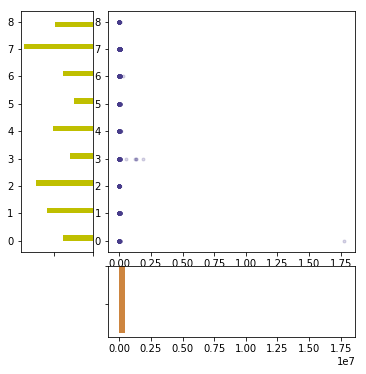

<Figure size 216x288 with 0 Axes>

In [230]:
# Set up the axes with gridspec
hotels_2 = hotels[hotels.total_cost.notnull()]
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
plt.figure(figsize=(3,4))
# scatter points on the main axes
main_ax.plot(hotels_2.night_cost, hotels_2.city_code, 'ok', markersize=3, alpha=0.2, color='darkslateblue')

# histogram on the attached axes
x_hist.hist(hotels_2.night_cost, 40, histtype='stepfilled',
            orientation='vertical', color='peru')
x_hist.invert_yaxis()

y_hist.hist(hotels_2.city_code, 40, histtype='stepfilled',
            orientation='horizontal', color='y')
y_hist.invert_xaxis()

#### Analysis based on the comparison between cost per night and cities using the data without anomalies:

The below graph represent the same values and variables than the previous analysis. However, though the exclusion of the anomalies, we can interpret the results easily and in a more accurate way. 
The distribution of bookings in the cities (left graph) shows the same distribution that the previos analysis, been cities 7 and 2 the most popular. Based on the price distribution through the cities we can see how different cities have more price variation, for example city 7 have way more price distribution than city 2. Finaly, The price follows a right-tail poisson distribution (a lot of hotels with similar average prices and few hotels with very high price)

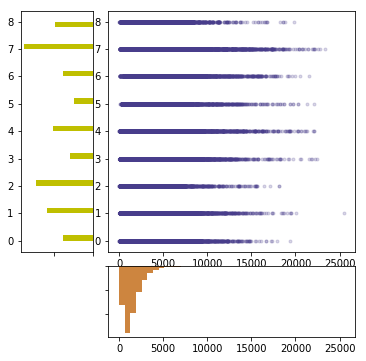

In [231]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(hotels_no_anomalies.night_cost, hotels_no_anomalies.city_code, 'ok', 
             markersize=3, alpha=0.2, color='darkslateblue')

# histogram on the attached axes
x_hist.hist(hotels_no_anomalies.night_cost, 40, histtype='stepfilled',
            orientation='vertical', color='peru')
x_hist.invert_yaxis()

y_hist.hist(hotels_no_anomalies.city_code, 40, histtype='stepfilled',
            orientation='horizontal', color='y')
y_hist.invert_xaxis()

#### Plot to compare between cost per night thorugh months based on the data without anomalies:

Through the following graph we can observe that May and June are the months with the higher number of bookings. We can also analyse the monthly variation on price per night. Thus, the following graph shows that May, June and July are the months with higher variation.

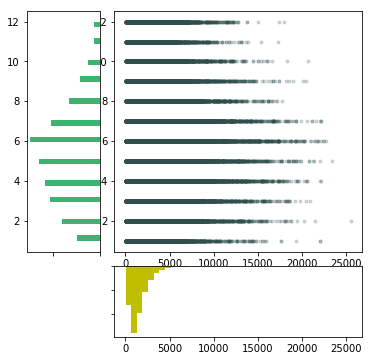

In [232]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(hotels_no_anomalies.night_cost, hotels_no_anomalies.trip_month, 'ok', 
             markersize=3, alpha=0.2, color='darkslategrey')

# histogram on the attached axes
x_hist.hist(hotels_no_anomalies.night_cost, 40, histtype='stepfilled',
            orientation='vertical', color='y')
x_hist.invert_yaxis()

y_hist.hist(hotels_no_anomalies.trip_month, 40, histtype='stepfilled',
            orientation='horizontal', color='mediumseagreen')
y_hist.invert_xaxis()

#### Boxplot between cities and cost per night original dataset:

The graph below shows boxplots for the 9 cities in relation to the night cost. The outliers included in the dataset make it impossible to understand the distribution of the night cost. In the next graph we will exclude the outliers.

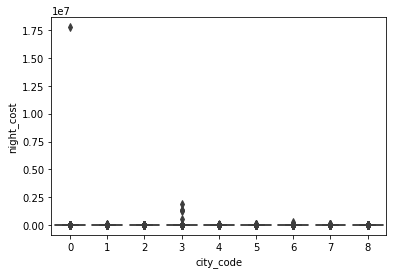

In [233]:
sns.boxplot(x="city_code", y="night_cost", data=hotels);

#### Boxplot between cities and cost per night dataset without anomalies:

The graph below shows boxplots for the 9 cities in relation to the night cost based on the dataset exluding the anomalies. Through this graph we can understand the different prices across the different cities, analyse the average of each city, the standard deviation and the outliers (not anomalies). In the one hand, we can see that the city 2 have a low dispersion of the prices, the lowest average price and a lot of values closed to the city average night-price. In the other hand, cities 3 or 7 have the highest price deviation from the mean and the city 6 the highest average price per night. 
Based on this analysis we can infer the socioecconomic level of each city and apply different strategies based on the average profile of users that book on those cities. We can also analyse the price deviation of each city and understand the main reasons (weather, season, different neighborhoods...) 

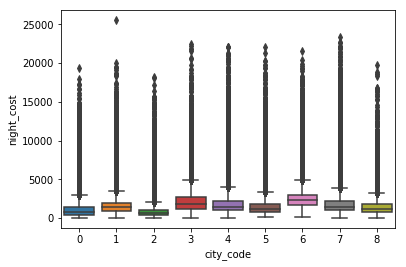

In [234]:
sns.boxplot(x="city_code", y="night_cost", data=hotels_no_anomalies);

#### Analysis using violinplots to compare the distribution of the cost of the night through the stars category hotels

The graph below we could confirm one of our assumptions and check the distribution of bookings per hotel rating (1 to 5 stars) and as we can see the violin distribution show that for one star hotels the bookings are concentrated “close to zero” and the five stars the distribution is more concentrated in higher prices.It is important to highlight that there are (too high) outliers for the four and five stars which affected the analysis so for a better interpretation of this distribution graph we decided to take them out.

In [235]:
only_hotels_1 = hotels_no_anomalies[hotels_no_anomalies.star_rating=="1"]
only_hotels_2 = hotels_no_anomalies[hotels_no_anomalies.star_rating=="2"]
only_hotels_3 = hotels_no_anomalies[hotels_no_anomalies.star_rating=="3"]
only_hotels_4 = hotels_no_anomalies[hotels_no_anomalies.star_rating=="4"]
only_hotels_5 = hotels_no_anomalies[hotels_no_anomalies.star_rating=="5"]
only_hotels_1_2_3 = pd.concat([only_hotels_1, only_hotels_2, only_hotels_3], axis=0)
only_hotels_4_5 = pd.concat([only_hotels_4, only_hotels_5], axis=0)
only_hotels= pd.concat([only_hotels_1, only_hotels_2, only_hotels_3, only_hotels_4, only_hotels_5], axis=0)

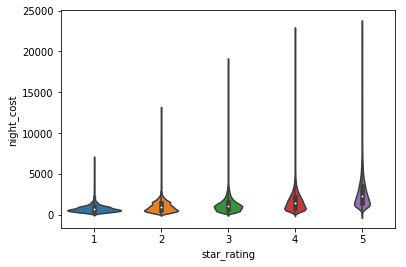

In [236]:
sns.violinplot(x="star_rating", y="night_cost", data=only_hotels);